In [1]:
import os
os.chdir('../..')
import numpy as np
import pickle
from tqdm import tqdm

In [2]:
from molexplain.vis import molecule_importance
from molexplain.utils import DATA_PATH, MODELS_PATH
from molexplain.train import DEVICE

RDKit WARNING: [16:14:49] Enabling RDKit 2019.09.3 jupyter extensions
Using backend: pytorch


In [28]:
import torch
model_pt = os.path.join(MODELS_PATH, 'cyp_noHs.pt')

from molexplain.net import MPNNPredictor

model = MPNNPredictor(node_in_feats=49,
                      edge_in_feats=10,
                      global_feats=4,
                      n_tasks=1,
                      output_f=torch.sigmoid).to(DEVICE) 
model.load_state_dict(torch.load(model_pt,
                                 map_location=DEVICE))

<All keys matched successfully>

In [4]:
from rdkit.Chem import MolFromSmiles
import pandas as pd

sar1 = pd.read_csv(os.path.join(DATA_PATH, 'cyp', 'cyp_sar1.csv'), sep=';')
sar1

,substituent,SMILES,value
0,4-imidazole,COC1=CC2=C(C=C1OC)C=C(C=C2)C(O)(C(C)C)C1=CNC=N1,1.60
1,3-pyrazole,COC1=CC2=C(C=C1OC)C=C(C=C2)C(O)(C(C)C)C1=NNC=C1,1.80
2,4-pyrazole,COC1=CC2=C(C=C1OC)C=C(C=C2)C(O)(C(C)C)C1=CNN=C1,27.00
3,"4-(1,2,3-Triazole)",COC1=CC2=C(C=C1OC)C=C(C=C2)C(O)(C(C)C)C1=CNN=N1,57.00
4,"3-(1,2,4-Triazole)",COC1=CC2=C(C=C1OC)C=C(C=C2)C(O)(C(C)C)C1=NNC=N1,100.00
5,5-Thiazole,COC1=CC2=C(C=C1OC)C=C(C=C2)C(O)(C(C)C)C1=CN=CS1,0.77
6,5-Oxazole,COC1=CC2=C(C=C1OC)C=C(C=C2)C(O)(C(C)C)C1=CN=CO1,6.50
7,3-Pyridine,COC1=CC2=C(C=C1OC)C=C(C=C2)C(O)(C(C)C)C1=CN=CC=C1,9.40
8,4-Pyridine,COC1=CC2=C(C=C1OC)C=C(C=C2)C(O)(C(C)C)C1=CC=NC=C1,4.50
9,4-Pyrimidine,COC1=CC2=C(C=C1OC)C=C(C=C2)C(O)(C(C)C)C1=NC=NC=C1,18.00


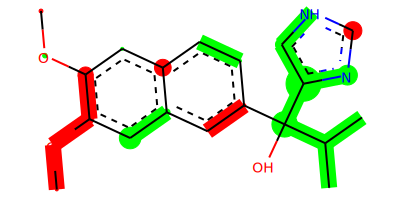

In [5]:
mol = MolFromSmiles(sar1['SMILES'][0])
_, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

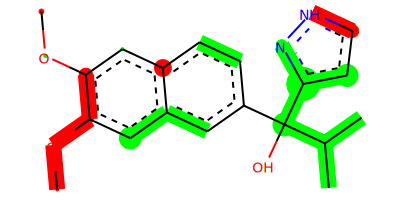

In [6]:
mol = MolFromSmiles(sar1['SMILES'][1])
_, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

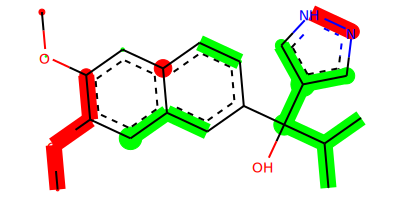

In [7]:
mol = MolFromSmiles(sar1['SMILES'][2])
_, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

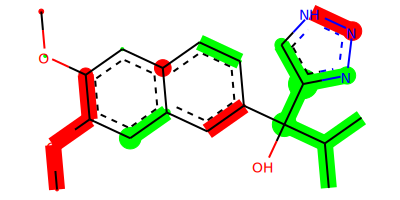

In [8]:
mol = MolFromSmiles(sar1['SMILES'][3])
_, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

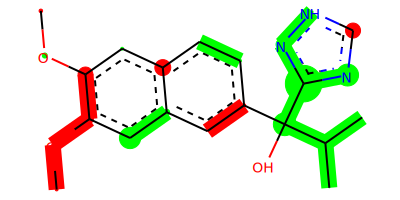

In [9]:
mol = MolFromSmiles(sar1['SMILES'][4])
_, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

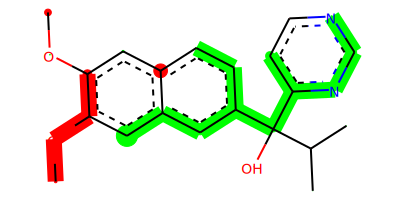

In [10]:
mol = MolFromSmiles(sar1['SMILES'][9])
_, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

In [17]:
sar3 = pd.read_csv(os.path.join(DATA_PATH, 'cyp', 'cyp_sar3.csv'))
sar3

,name,SMILES,ic50(um)
0,pyridine,C1=CC=NC=C1,4000.00
1,aminoethylpyridine,NCCC1=CN=CC=C1,5000.00
2,5,NCCCCCC(=O)NCC1=CN=CC=C1,1000.00
3,4,CC(C)(C)OC(=O)NCCCCCC(=O)NCC1=CN=CC=C1,75.00
4,11,CC(C)(C)OC(=O)N[C@H](CSCCC(=O)NCC1=CN=CC=C1)CC...,30.00
5,15a,CC(C)(C)OC(=O)N[C@H](CSCCC(=O)NCC1=CN=CC=C1)CC...,0.52
6,15b,CC(C)(C)OC(=O)N[C@H](CSCCC(=O)NCC1=CN=CC=C1)CC...,0.21


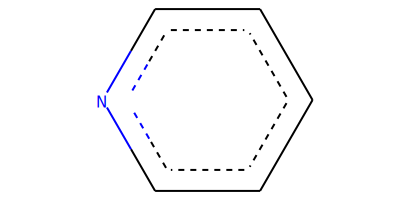

In [29]:
mol = MolFromSmiles(sar3['SMILES'][0])
_, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

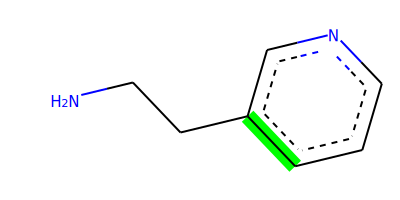

In [30]:
mol = MolFromSmiles(sar3['SMILES'][1])
_, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                     version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

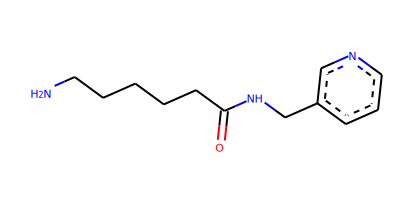

In [31]:
mol = MolFromSmiles(sar3['SMILES'][2])
_, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

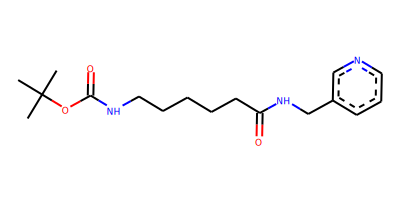

In [32]:
mol = MolFromSmiles(sar3['SMILES'][3])
_, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

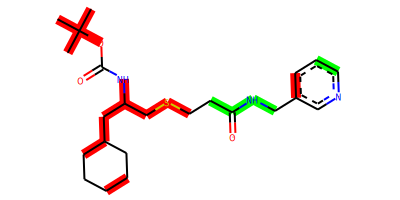

In [33]:
mol = MolFromSmiles(sar3['SMILES'][4])
_, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

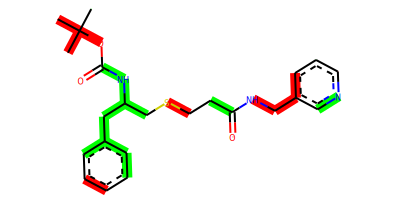

In [34]:
mol = MolFromSmiles(sar3['SMILES'][5])
_, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

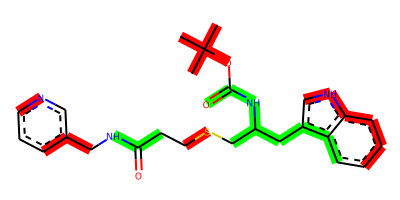

In [35]:
mol = MolFromSmiles(sar3['SMILES'][6])
_, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img